In [41]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt

#################### step1.upload data ########################################
train = pd.read_json('train.json')

################## step2. preliminary data analysis############################
 
print(train.head(10)) # check data format
print(train.info()) # check missing values
print(train.describe()) # numerical data descriptions
print(train.groupby('interest_level').size())

        bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   
100014        2.0         4  38a913e46c94a7f46ddf19b756a9640c   
100016        1.0         2  3ba49a93260ca5df92fde024cb4ca61f   
100020        2.0         1  0372927bcb6a0949613ef5bf893bbac7   
100026        1.0         1  a7efbeb58190aa267b4a9121cd0c88c0   
100027        2.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   
100014  2016-04-19 04:24:47   
100016  2016-04-27 03:19:56   
100020  2016-04-13 06:01:42   
10002

In [2]:
# guarantee that different class have similar amount of training set
train['interest_level'] = train['interest_level'].map({'high':1, 'medium':1, 'low':0})  
print(train.groupby('interest_level').size())

interest_level
0    34284
1    15068
dtype: int64


In [3]:
# check missing values -- no missing values for all 13 columns
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [4]:
train.drop(['manager_id'], inplace=True, axis=1)
train.drop(['building_id'], inplace=True, axis=1)
train.drop(['listing_id'], inplace=True, axis=1)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 12 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null int64
latitude           49352 non-null float64
longitude          49352 non-null float64
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 4.9+ MB
None


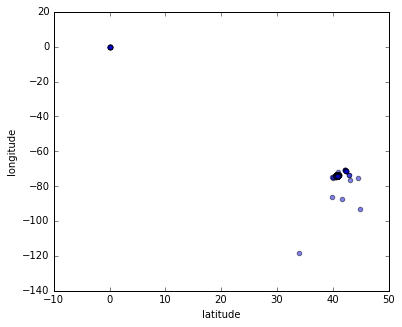

In [5]:
# plot latitude versus longitude, check location distribution, Figure 1-3

figure = plt.figure(figsize=(6, 5))
plt.scatter(train['latitude'], train['longitude'], alpha=0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()


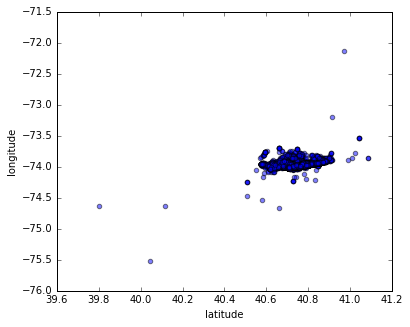

In [6]:
# remove longtiude = 0 data
# Latitude and longitude coordinates of new york city: 40.730610, -73.935242.
# let's say commute 250 miles along all directions, corresponds to ~4 degree in latitude and ~5 degree in longitude

train = train[(train['longitude'] < -71.435) & (train['longitude'] > -76.435) & (train['latitude'] > 38.73) & (train['latitude'] < 42.73)]


figure = plt.figure(figsize=(6, 5))
plt.scatter(train['latitude'], train['longitude'], alpha=0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()


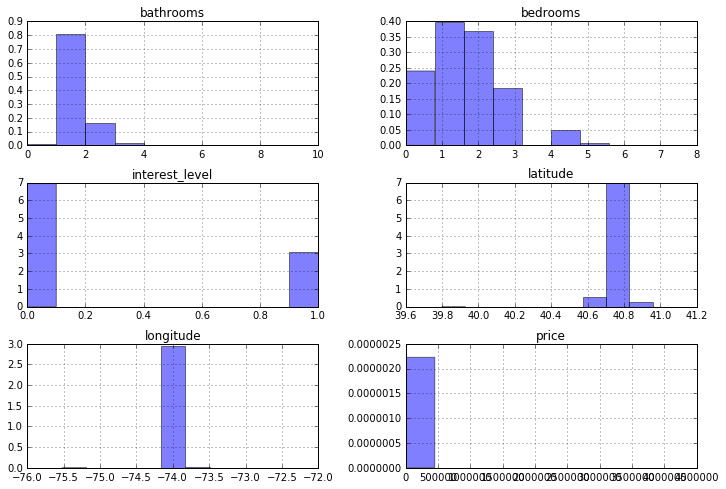

In [7]:
train.hist(figsize=(12,8), bins = 10, alpha = 0.5, normed = True)
#train.hist(figsize=(12,8))
plt.show()

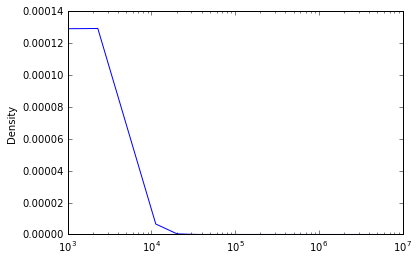

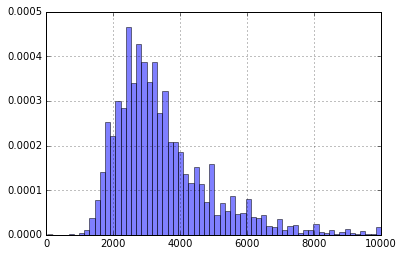

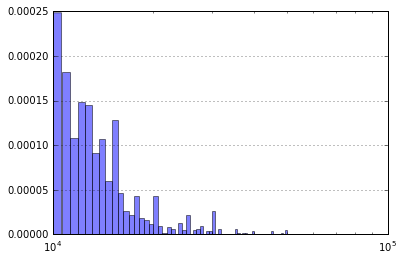

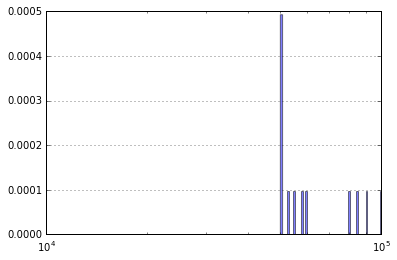

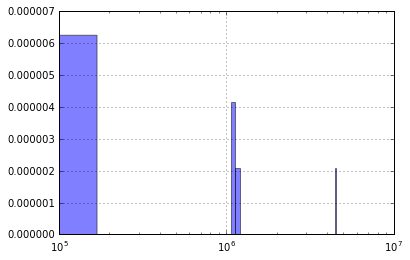

In [8]:
train['price'].plot(logx = True, kind = 'kde')
plt.show()

train['price'].hist(bins=64, range=(40, 10000), alpha = .5, normed = True)
plt.show()

fig, ax = plt.subplots()
train['price'].hist(ax=ax, bins=64, range=(10000, 50000), alpha = .5, normed = True)
ax.set_xscale('log')
plt.show()

fig, ax = plt.subplots()
train['price'].hist(ax=ax, bins=64, range=(50000, 100000), alpha = .5, normed = True)
ax.set_xscale('log')
plt.show()

fig, ax = plt.subplots()
train['price'].hist(ax=ax, bins=64, range=(100000, 4490000), alpha = .5, normed = True)
ax.set_xscale('log')
plt.show()

In [130]:
# check rental price > 10^5, it might be typo without decimal point
train[train['price'] > 100000]
# these prices looks more like selling prices instead of rental prices, remove these data

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,manager_id,photos,price,street_address,doorman,elevator,pet,wifi,parking,swimming
12168,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.8011,7208794,...,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street,1,1,0,0,0,0
123877,0.0,0,b9c72643feb2652536a898a5f13d2543,2016-04-12 02:11:10,"Originally built in 1862, this extraordinary l...",Duane Street,"[Elevator, Pre-War, Terrace, Dogs Allowed, Cat...",low,40.7161,6857401,...,d98acd4fa3c463bd468603bd873cc54c,[https://photos.renthop.com/2/6857401_a4a4c2f2...,135000,144 Duane Street,0,1,0,0,0,0
32611,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.7299,7208764,...,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street,1,1,0,0,0,0
4620,1.0,0,c0d27c9422c375c651baa7b61e4a9dca,2016-06-07 17:35:10,The BEST DEAL!!!!!\r\rBeautiful Studio in a ni...,Van Horn St and 57th ave,"[Elevator, Laundry In Building, Balcony]",high,40.7323,7122037,...,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7122037_531f0877...,111111,57-25 Van Horn St,0,1,0,0,0,0
55437,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",low,40.7676,7013217,...,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street,1,0,0,0,0,0
57803,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7676,7036279,...,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street,1,1,0,0,0,0


In [131]:
train = train[train['price']<100000]

In [113]:
# derive important parameter from features

import re
terms = set()

for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('doorman', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

** holy deal batman!! * oversized 3br mansion * 2 full baths * huge scenic terrace * doorman * elev/lndry bldg * roof deck * real pix **
** lex ave luxury! * sprawling sunfilled 1br home * all utilities incl! * doorman * elev/lndry bldg * cats ok **
** midtown mansion * sprawling sunfilled studio * utilities included * doorman * elev/lndry bldg * pets ok **
24 hour doorman
24 hour doorman concierge
24 hr doorman
24-hour concierge and doorman
24-hour doorman
24/7 doorman
24/7 doorman concierge
24/7 full-time doorman concierge
24hr doorman
24hr white-gloved doorman
doorman
ft doorman
full-time doorman
no fee...luxury doorman building^^^river views
part-time doorman
twenty-four hour concierge and doorman
twenty-four-hour concierge and doorman
virtual doorman
• on-site lifestyle concierge by luxury attaché •24/7 doorman • state of the art cardiovascular and weight training equipment • 24-hour valet parking garage • valet services including dry cleaning


In [117]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('elevator', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

elevator
elevator & laundry
elevator building
elevator/laundry/ so close to the 6 $2450!!
high speed elevator
keyed elevator with direct access into your living room
rent stabilize - elevator building


In [120]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('pet', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

** chic chelsea steal! * super sweet studio * gourmet chef's kitchen * all modern & new * tons of storage * pets ok **
** classy corner studio * oversized & underpriced * windows all around * pets ok **
** classy corner studio supreme * walls of windows * all modern & new * pets ok **
** diamond uws deal! * massive studio * exposed brick * dishwasher * pets ok * steps to the park! **
** e60s excellence * sprawling 1br home * gourmet kitchen * windows all around * pets ok **
** entire floor! * enormous 4br mega-share * magic eraser clean * unique renovations * pets ok **
** extra sweet east village! * massive 2br home * ornate prewar details * exposed brick * cook's kitchen * pets ok **
** eye popping no fee! * massive 1br home * exposed brick * private terrace * dishwasher * elev bldg * roof deck * pets ok **
** holy deal batman! * entire floor! * massive 4br mansion * gourmet kitchen * pets ok **
** holy no fee deal batman! * massive 1br home * chef's kitchen * magic eraser clean * pe

In [121]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('dog', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

dog okay
dogs allowed
dogs ok
dogs under 20 lbs.                parking ( additional fee)
on site dog park and pet spa
one small dog ok on approval
pets: cats/small dogs
pre-war small dogs
small dogs ok
specific dog breeds up to 40lbs
state-of-the-art fitness center and even an on-site dog run


In [122]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('cat', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

$250 application fee with background and credit check. board interview and approval.
* marvelous midtown gem * spacious sundrenched studio * stunning prewar details * cats ok **
** chic chelsea find! * massive 4br home * 2 full baths * chef inspired kitchen * elev that opens into apt * cats ok **
** classy conv 2br duplex dream! * room to entertain * lndry bldg * cats ok * heart of the village **
** lex ave luxury! * sprawling sunfilled 1br home * all utilities incl! * doorman * elev/lndry bldg * cats ok **
** pristine modern townhouse! * massive 2br home * chef inspired kitchen * huge windows galore * cats ok **
** super sweet 1br home * elegant e60s! * mr clean approved * chef inspired kitchen * tons of natural light! * cats ok **
** w60s wonder ~ near the park! * overszed studio steal * courtyard * free gym * elev/lndry bldg * cats ok **
-greal location
absolute value for size & location
building link notification & key track for tenants convenience
catering facility
cats allowed
ca

In [124]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('internet', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

fios high speed internet
free cable tv and wireless internet
high speed internet
high speed internet available
high-speed internet
high-speed internet access
landlord paying for all utilities! tenant pays for cable / tv / internet.
rent includes cable tv and wireless internet
residents can choose from three high-speed internet providers: verizon fios


In [125]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('wifi', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

000-square foot sun deck• free wifi in marc club
free wifi
free wifi in club lounge
garage fitness facility laundry room valet lounge billiards room rooftop deck wifi access
lounge w/ free wifi
lounge with wifi
wifi
wifi access
wifi in resident lounge


In [126]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('parking', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

24-hour parking garage with an electric vehicle charging station.
assigned-parking-space
attached parking
attached parking garage
common parking/garage
dogs under 20 lbs.                parking ( additional fee)
garage parking
garage parking!
indoor parking
no alternate side parking rules in neighborhood
on-site parking
on-site parking available
on-site parking garage
on-site parking lot
parking
parking available
parking garage
parking space
parking spot with additional fee
previous tenant found easy on-street parking.
private parking
standard on-site parking
unassigned paid parking available
unassigned paid parking available nearby
underground parking
valet parking
• on-site lifestyle concierge by luxury attaché •24/7 doorman • state of the art cardiovascular and weight training equipment • 24-hour valet parking garage • valet services including dry cleaning


In [127]:
terms = set()
for x in train['features']:
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('swimming', phrase_lc):
            terms.add(phrase_lc)
        
unique_terms = sorted(terms)
for term in unique_terms:
    print( term )

available  05/01/16      swimming pool         dishwasher
gym fitness lounge swimming pool sun decks exercise studios indoor half-basketball court
health club & indoor swimming pool
indoor swimming pool
state-of-the-art swimming pool
swimming pool
well mainatained swimming pool


In [110]:
class Feature:
    def __init__(self):
        self.doorman = 0
        self.elevator = 0
        self.pet = 0
        self.parking = 0
        self.swimming = 0

In [128]:
features_list = []

for x in train['features']:
    f = Feature()
    features_list.append(f)
    for phrase in x:
        phrase_lc = phrase.strip().lower()
        if re.search('doorman', phrase_lc):
            f.doorman = 1
        if re.search('elevator', phrase_lc):
            f.elevator = 1
        if re.search('no pets', phrase_lc):
            f.pet = 1
        if re.search('paid parking', phrase_lc) or re.search('parking ( additional fee)', phrase_lc) or re.search('parking spot with additional fee', phrase_lc):
            f.parking = 1
        if re.search('swimming pool', phrase_lc):
            f.swimming = 1

doorman_ = [f.doorman for f in features_list]  
elevator_ = [f.elevator for f in features_list]
pet_ = [f.pet for f in features_list]
wifi_ = [f.wifi for f in features_list]
parking_ = [f.parking for f in features_list]
swimming_ = [f.swimming for f in features_list]

train['doorman'] = doorman_
train['elevator'] = elevator_
train['pet'] = pet_
train['wifi'] = wifi_
train['parking'] = parking_
train['swimming'] = swimming_        
        

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 21 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
doorman            49352 non-null int64
elevator           49352 non-null int64
pet                49352 non-null int64
wifi               49352 non-null int64
parking            49352 non-null int64
swimming           49352 non-null int64
dtypes: float64(3), int64(9), objec

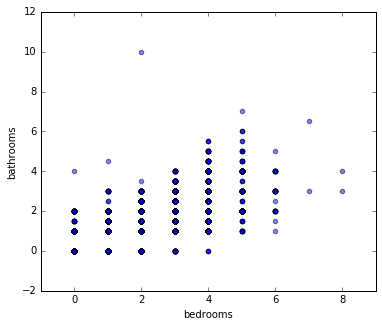

In [132]:
# visualize distribution of bedrooms, range(0-8)
figure = plt.figure(figsize=(6, 5))
plt.scatter(train['bedrooms'], train['bathrooms'], alpha=0.5)
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

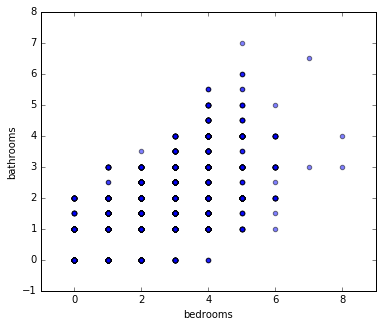

In [134]:
# throw away dataset when bathrooms >= 4 & bedrooms<=2

train = train[~((train['bathrooms']>=4) & (train['bedrooms']<=2))]

figure = plt.figure(figsize=(6, 5))
plt.scatter(train['bedrooms'], train['bathrooms'], alpha=0.5)
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

0.0 7.0


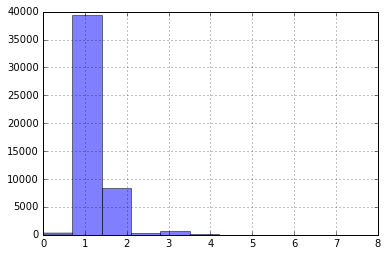

In [135]:
# visualize distribution of bathrooms, range(0-10)
print(train['bathrooms'].min(), train['bathrooms'].max())
train['bathrooms'].hist(bins=10, alpha = .5)
plt.show()

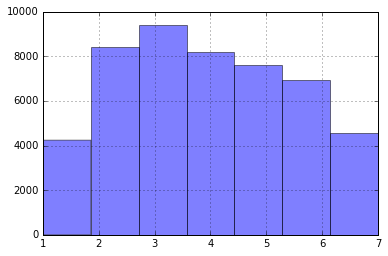

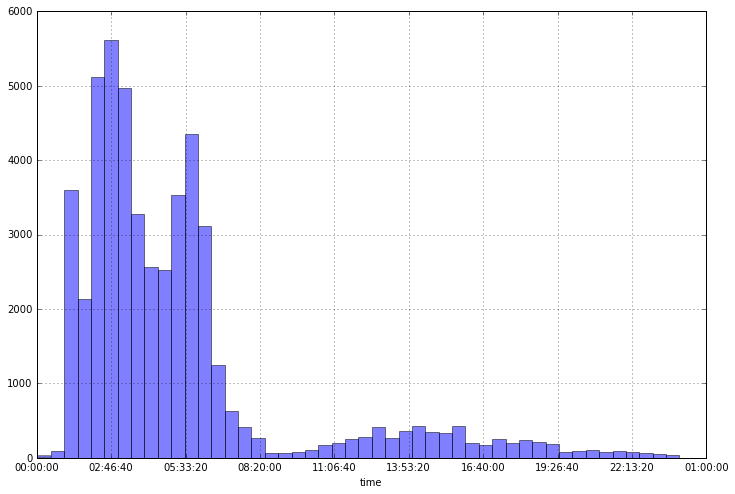

In [136]:
# change 'created' timeframe into numerical values, check distribution, divide into multiple categories
from datetime import time
from datetime import timezone

times = pd.to_datetime(train['created']) # object to datetime64[ns]
# pd.Timestamp(train['created']) # object to timestamp

dayoftheweek = [t.isoweekday() for t in times]
timeoftheday = [t.time() for t in times]
pd.Series(dayoftheweek).hist(bins=7, alpha = 0.5) # Sunday and Monday least, others similar 
plt.show()
pd.Series(timeoftheday).hist(bins=48, figsize=(12, 8), alpha = 0.5) # 1-8 am most
plt.show()

In [137]:
daycategory = [0 if t.isoweekday() <= 5 else 1 for t in times]
hourcategory = [0 if time(9) <= t.time() and t.time() < time(17) else 1 for t in times]
train['day'] = daycategory
train['hour'] = hourcategory
train = train.drop(['created'], axis=1)

In [138]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49342 entries, 10 to 99994
Data columns (total 22 columns):
bathrooms          49342 non-null float64
bedrooms           49342 non-null int64
building_id        49342 non-null object
description        49342 non-null object
display_address    49342 non-null object
features           49342 non-null object
interest_level     49342 non-null object
latitude           49342 non-null float64
listing_id         49342 non-null int64
longitude          49342 non-null float64
manager_id         49342 non-null object
photos             49342 non-null object
price              49342 non-null int64
street_address     49342 non-null object
doorman            49342 non-null int64
elevator           49342 non-null int64
pet                49342 non-null int64
wifi               49342 non-null int64
parking            49342 non-null int64
swimming           49342 non-null int64
day                49342 non-null int64
hour               49342 non-null in

In [139]:
photo_number = []

for i, x in train.iterrows():
    if len(x.photos) > 0:
        photo_number.append(1)
    else:
        photo_number.append(len(x.photos))
 
train = train.assign(photo_number = photo_number)
train['photo_number']

10        1
10000     1
100004    1
100007    1
100013    1
100014    1
100016    1
100020    1
100026    1
100027    1
100030    1
10004     1
100044    1
100048    1
10005     1
100051    1
100052    1
100053    1
100055    0
100058    1
100062    1
100063    1
100065    0
100066    1
10007     1
100071    1
100075    1
100076    1
100079    1
100081    1
         ..
99915     1
99917     1
99919     1
99921     1
99923     1
99924     1
99931     1
99933     1
99935     1
99937     1
9994      1
99953     1
99956     1
99960     1
99961     1
99964     1
99965     1
99966     1
99979     0
99980     1
99982     1
99984     1
99986     1
99987     1
99988     1
9999      1
99991     1
99992     1
99993     1
99994     1
Name: photo_number, dtype: int64

In [140]:
print(train.groupby('photo_number').size())  # 7.5% of the population doesn't have any uploaded photos

photo_number
0     3612
1    45730
dtype: int64


In [144]:
# simplified ML
train = train.drop(['description', 'display_address', 'features', 'latitude', 'longitude', 'photos', 'street_address', 'building_id', 'listing_id', 'manager_id'], axis=1)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49342 entries, 10 to 99994
Data columns (total 13 columns):
bathrooms         49342 non-null float64
bedrooms          49342 non-null int64
interest_level    49342 non-null object
price             49342 non-null int64
doorman           49342 non-null int64
elevator          49342 non-null int64
pet               49342 non-null int64
wifi              49342 non-null int64
parking           49342 non-null int64
swimming          49342 non-null int64
day               49342 non-null int64
hour              49342 non-null int64
photo_number      49342 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 5.3+ MB
None


In [145]:
y = train['interest_level']
x = train.drop(['interest_level'], axis = 1)

ScaledLR: 0.692493 (0.008623)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("V

ScaledLDA: 0.694085 (0.008991)
ScaledKNN: 0.670923 (0.007169)
ScaledCART: 0.668809 (0.004413)
ScaledNB: 0.609226 (0.143653)
ScaledSVM: 0.693998 (0.008688)


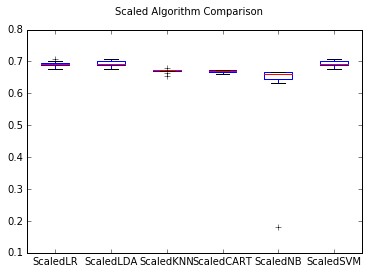

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

validation_size = 0.30
seed = 6
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size 
                                               = validation_size, random_state = seed)
# standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

from sklearn.metrics import accuracy_score
results = []
names = []
scoring = 'accuracy'
num_folds = 10
seed = 7

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    

# compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# ensemble methods 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()